<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/cat_in_the_dat_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.shape, test.shape

((222367, 25), (200000, 24))

In [ ]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2.0,Grandmaster,Cold,h,D,kr,2.0,2.0,0.0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1.0,Grandmaster,Hot,a,A,bF,7.0,8.0,0.0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1.0,Expert,Lava Hot,h,R,Jc,7.0,2.0,0.0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1.0,Grandmaster,Boiling Hot,i,D,kW,2.0,1.0,1.0
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1.0,Grandmaster,Freezing,a,R,qP,7.0,8.0,0.0


In [ ]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [ ]:
def summary(df):
  summary = pd.DataFrame(df.dtypes,columns=['데이터 타입'])
  summary.reset_index(inplace=True)
  summary = summary.rename(columns={'index':'피처'})
  summary['결측치 수'] = df.isnull().sum().values
  summary['고유값 수'] = df.nunique().values
  # summary['데이터'] = df.iloc[:,:6].apply(lambda row: ','.join(map(str, row)), axis=1)
  summary['데이터'] = df.apply(lambda row: ','.join(map(str, row)), axis=1)
  return summary
summary(train)

,피처,데이터 타입,결측치 수,고유값 수,데이터
0,id,int64,0,222367,"0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Basso..."
1,bin_0,int64,0,2,"1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Pia..."
2,bin_1,int64,0,2,"2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremi..."
3,bin_2,int64,0,2,"3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f1..."
4,bin_3,object,0,2,"4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0..."
5,bin_4,object,0,2,"5,0,1,1,T,N,Blue,Polygon,Lion,Costa Rica,Oboe,..."
6,nom_0,object,0,3,"6,0,1,1,T,N,Green,Trapezoid,Cat,China,Piano,be..."
7,nom_1,object,0,6,"7,1,0,1,T,Y,Red,Triangle,Dog,Russia,Oboe,72f80..."
8,nom_2,object,0,6,"8,1,0,1,T,Y,Blue,Square,Hamster,Canada,Bassoon..."
9,nom_3,object,0,6,"9,0,0,0,F,Y,Red,Trapezoid,Lion,China,Piano,ad9..."


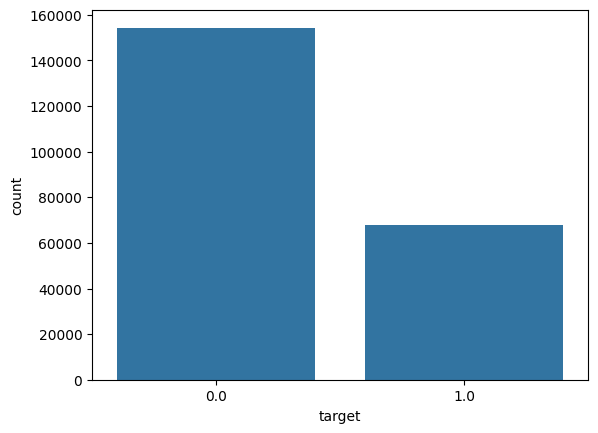

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=train,x = 'target')
plt.show()

In [ ]:
all_data = pd.concat([train,test])
all_data = all_data.drop(columns=['id','target'])
all_data.shape

(422367, 23)

In [ ]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2.0,Grandmaster,Cold,h,D,kr,2.0,2.0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1.0,Grandmaster,Hot,a,A,bF,7.0,8.0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1.0,Expert,Lava Hot,h,R,Jc,7.0,2.0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1.0,Grandmaster,Boiling Hot,i,D,kW,2.0,1.0
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1.0,Grandmaster,Freezing,a,R,qP,7.0,8.0


one-hot인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
all_data_onehot =  ohe.fit_transform(all_data)

In [ ]:
# 학습용 테스트용 만들고 학습용은 다시 학습용과 검증용  데이터분포를 고려해서 분리한다.
split_num = len(train)
X_train = all_data_onehot[:split_num]
X_test = all_data_onehot[split_num:]
y = train['target']

# Check for missing values in 'y' and handle them
print(y.isnull().sum()) # Check the number of missing values

# Option 1: Remove rows with missing target values
y = y.dropna()
X_train = X_train[y.index] # Adjust X_train accordingly

# Option 2: Impute missing values (e.g., with the mean)
# y = y.fillna(y.mean())

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, stratify=y, random_state=42)

1


In [ ]:
# basemodel RogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.predict_proba(x_val)

array([[0.71713956, 0.28286044],
       [0.53190474, 0.46809526],
       [0.54380842, 0.45619158],
       ...,
       [0.80761895, 0.19238105],
       [0.6682797 , 0.3317203 ],
       [0.93917192, 0.06082808]])

In [ ]:
y_valid_preds_1 = model.predict_proba(x_val)[:,1] # 1될 확률 예측

In [ ]:
y_valid_preds_1

array([0.28286044, 0.46809526, 0.45619158, ..., 0.19238105, 0.3317203 ,
       0.06082808])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_valid_preds_1)

0.7917375872779404

In [ ]:
y_valid_preds_0 = model.predict_proba(x_val)[:,1] # 0될 확률 예측

In [ ]:
y_valid_preds_0

array([0.28286044, 0.46809526, 0.45619158, ..., 0.19238105, 0.3317203 ,
       0.06082808])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_valid_preds_0)

0.7917375872779404

In [ ]:
# 타겟이 1일때의 예측
y_preds = model.predict_proba(X_test)[:,1]
submission['target'] = y_preds
submission.to_csv('submission.csv',index=False)

In [ ]:
# 랜덤포레스트 사용
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model2.predict_proba(x_val)

array([[0.58, 0.42],
       [0.64, 0.36],
       [0.55, 0.45],
       ...,
       [0.79, 0.21],
       [0.79, 0.21],
       [0.86, 0.14]])

In [ ]:
y_valid_preds_1 = model2.predict_proba(x_val)[:,1] # 1될 확률 예측

In [ ]:
y_valid_preds_1

array([0.42, 0.36, 0.45, ..., 0.21, 0.21, 0.14])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_valid_preds_1)

0.7363847627519647

In [ ]:
# 타겟이 1일때의 예측
y_preds = model.predict_proba(X_test)[:,1]
submission['target'] = y_preds
submission.to_csv('submission.csv',index=False)

데이터 전처리

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
# 두 데이터 합침
all_data = pd.concat([train,test])
all_data = all_data.drop(columns=['id','target'])
all_data.shape

(500000, 23)

In [ ]:
# 이진 피처, 순서형 피처
binary_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']
ordinal_features = ['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']

In [ ]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [ ]:
all_data['bin_3'].unique() , all_data['bin_4'].unique()

(array(['T', 'F'], dtype=object), array(['Y', 'N'], dtype=object))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['bin_3','bin_4']:
  all_data[col] = le.fit_transform(all_data[col])

In [ ]:
all_data[['bin_3','bin_4']]

,bin_3,bin_4
0,1,1
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
199995,0,0
199996,0,1
199997,1,1
199998,1,1


In [ ]:
all_data['ord_1'].unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [ ]:
# ord_1, ord_2 사용자가 순서에 맞게 라벨인코딩
# ord_3 ~ 5 알파벳 OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ord345 = ['ord_3','ord_4','ord_5']
all_data[ord345] = oe.fit_transform(all_data[ord345])

In [ ]:
all_data[ord345]

,ord_3,ord_4,ord_5
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0
...,...,...,...
199995,9.0,0.0,25.0
199996,5.0,18.0,17.0
199997,6.0,21.0,66.0
199998,6.0,23.0,82.0


In [ ]:
all_data['ord_1'].unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [ ]:
temp = {
    'Grandmaster': 0,
    'Expert':1,
    'Contributor':2,
    'Novice':3,
    'Newbie':4
    }
all_data['ord_1'] = all_data['ord_1'].map(temp)

In [ ]:
all_data['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [ ]:
temp = {
    'Freezing': 0,
    'Cold':1,
    'Warm':2,
    'Hot':3,
    'Boiling Hot':4,
    'Lava Hot':5
    }
all_data['ord_2'] = all_data['ord_2'].map(temp)

In [ ]:
all_data['nom_0'].unique()

array(['Green', 'Blue', 'Red'], dtype=object)

In [ ]:
## 명목형 피처는 onehot으로 encording
all_data.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [ ]:
nom_col = ['nom_' + str(i) for i in range(10)]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
for col in nom_col:
    if col not in all_data.columns:
        all_data[col] = 0  # Or any appropriate initialization

# Now apply OneHotEncoder
all_data_encoded = ohe.fit_transform(all_data[nom_col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
all_data_encoded.shape

(500000, 16276)

In [ ]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,0.0,1,7.0,3.0,136.0,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,0.0,3,0.0,0.0,93.0,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,1.0,5,7.0,17.0,31.0,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,0.0,4,8.0,3.0,134.0,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,0.0,0,0.0,17.0,158.0,7,8


In [ ]:
all_data.drop(columns=nom_col,inplace=True)

In [ ]:
# 데이터 합치기
all_data = pd.concat([all_data.reset_index(drop=True),
                       pd.DataFrame(all_data_encoded)], axis=1) # Remove .toarray()

In [ ]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,...,16266,16267,16268,16269,16270,16271,16272,16273,16274,16275
0,0,0,0,1,1,2,0.0,1,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1,1,1,0.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,1,1,1.0,5,7.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,1,1,0.0,4,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,1,0.0,0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
date_cols = ['day','month']
date_cols_encode = OneHotEncoder().fit_transform(all_data[date_cols])
all_data.drop(columns=date_cols,inplace=True)
all_data = pd.concat([all_data.reset_index(drop=True),
                       pd.DataFrame(date_cols_encode.toarray())], axis=1)

In [ ]:
# 스케일일
all_data.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_data[['ord_1','ord_2','ord_3','ord_4','ord_5']] \
= scaler.fit_transform(all_data[['ord_1','ord_2','ord_3','ord_4','ord_5']])


In [ ]:
all_data

In [ ]:
## all_data, date_cols_encode, nom_cols_encodeing 합치기
# one hot 으로 만든 데이터는 희소행렬 한개 빼고는 대부분 0으로 채워져 있는데이터
from scipy import sparse
all_data_sparse = sparse.hstack([all_data, date_cols_encode, all_data_encoded], format='csr')

In [ ]:
all_data_sparse

In [ ]:
# 데이터 나누기
train_num = len(train)
X_train = all_data_sparse[:train_num]
X_test = all_data_sparse[train_num:]
y = train['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
y_valid_preds_1 = model.predict_proba(x_val)[:,1] # 1될 확률 예측
roc_auc_score(y_val,y_valid_preds_1)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
prams = {
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear'],
    'max_iter' : [1000]
}
grid = GridSearchCV(model,param_grid=prams,cv=5,scoring='roc_auc')
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.best_estimator_.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)